Run Instructions:
1. click the folder icon ("files") located at the left, and use the first button at the top to upload the provided data_daily.csv
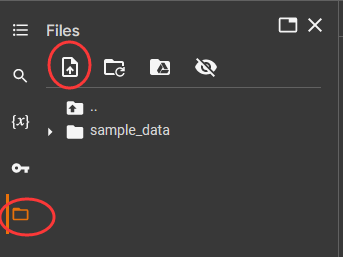
2. Runtime -> Restart and run all

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
#Read file
data = []
with open('data_daily.csv', mode ='r')as file:
    csvFile = csv.reader(file)
    for line in csvFile:
        data.append(line)

In [3]:
#Remove first row (title)
data = data[1:]

In [4]:
y = [[int(y)] for x,y in data]

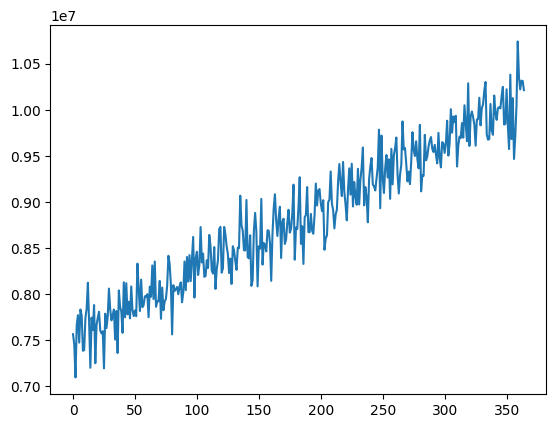

In [5]:
#See data trend
plt.plot(y)
plt.show()

From the trend of the data provided, a simple linear regression would probably suffice for this task. I tried using deep learning models such as LSTM to do time-series prediction, but didn't turn out to be good.

In [6]:
X = list(range(0, 365))
Xnew = np.vstack([X, np.ones(len(X))]).T

In [7]:
m, c = np.linalg.lstsq(Xnew, y, rcond=None)[0]

In [8]:
m, c

(array([7120.06801341]), array([7530713.67361329]))

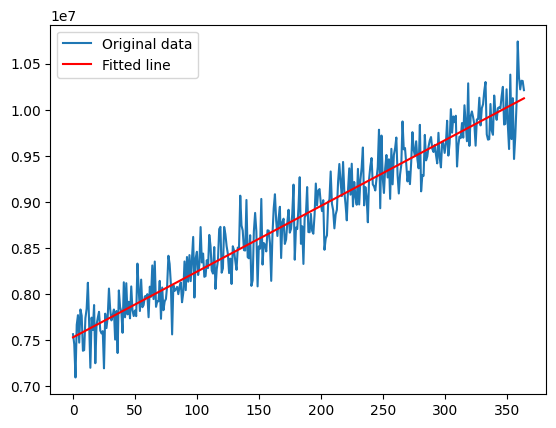

In [9]:
plt.plot(X, y, label='Original data')
plt.plot(X, m*X + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [10]:
nextYearX = list(range(366, 366+365))

In [11]:
preds = nextYearX * m + c

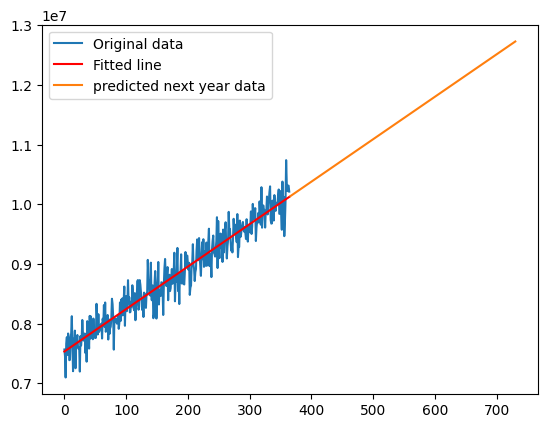

In [12]:
plt.plot(X, y, label='Original data')
plt.plot(X, m*X + c, 'r', label='Fitted line')
plt.plot(nextYearX, preds, label = 'predicted next year data')
plt.legend()
plt.show()

In [13]:
jan = np.average(preds[:31])
feb = np.average(preds[31:59])
mar = np.average(preds[59:90])
apr = np.average(preds[90:120])
may = np.average(preds[120:151])
jun = np.average(preds[151:181])
jul = np.average(preds[181:212])
aug = np.average(preds[212:243])
sep = np.average(preds[243:273])
otb = np.average(preds[273:304])
nov = np.average(preds[304:334])
dec = np.average(preds[334:])
monthlyPreds = [jan, feb, mar, apr, may, jun, jul, aug, sep, otb, nov, dec]

In [14]:
print(monthlyPreds)

[10243459.586724348, 10453501.593120089, 10663543.59951583, 10880705.673924979, 11097867.748334132, 11315029.822743284, 11532191.897152439, 11752914.005568298, 11970076.07997745, 12187238.154386602, 12404400.228795754, 12621562.303204909]
